In [106]:
import numpy as np
from pyESN import ESN
from matplotlib import pyplot as plt

import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.svm import SVC,SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [107]:
df=pd.read_csv('value.csv')
df=df.drop(columns=['Unnamed: 0'])
df_date=df['Date']
df=df.drop(columns=['Date'])
df

,Volume,nasdak,sp
0,1014545,2006.680054,1108.479980
1,685130,2047.359985,1122.219971
2,582520,2057.370117,1123.670044
3,970955,2077.679932,1126.329956
4,697725,2100.250000,1131.920044
...,...,...,...
4556,1575905,11718.120117,4090.459961
4557,1412939,11891.790039,4137.290039
4558,1308899,11960.150391,4136.129883
4559,745937,12070.589844,4147.600098


In [80]:
df=df.drop(columns=['forward_kr'])
df

KeyError: "['forward_kr'] not found in axis"

In [108]:
scaler = MinMaxScaler()
scaler.fit(df[['Volume']])
df[['Volume']]=scaler.transform(df[['Volume']])
scaler.fit(df[['nasdak']])
df[['nasdak']]=scaler.transform(df[['nasdak']])
scaler.fit(df[['sp']])
df[['sp']]=scaler.transform(df[['sp']])
df['sp']

0       0.104841
1       0.108176
2       0.108528
3       0.109174
4       0.110531
          ...   
4556    0.828618
4557    0.839984
4558    0.839703
4559    0.842487
4560    0.828606
Name: sp, Length: 4561, dtype: float64

In [110]:
df.describe()

,Volume,nasdak,sp
count,4561.000000,4561.000000,4561.000000
mean,0.086225,0.262221,0.330034
std,0.067388,0.250522,0.243676
min,0.000000,0.000000,0.000000
25%,0.041453,0.071003,0.140788
50%,0.069037,0.148531,0.233952
75%,0.109246,0.397428,0.484021
max,1.000000,1.000000,1.000000


In [111]:
for i in range(4561):
    if df['nasdak'][i]>0.33:
        df['nasdak'][i]=1
    elif df['nasdak'][i]<=0.33 and df['nasdak'][i]>=0.1:
        df['nasdak'][i]=0
    elif df['nasdak'][i]<0.1:
        df['nasdak'][i]=-1
        
for i in range(4561):
    if df['sp'][i]>0.36:
        df['sp'][i]=1
    elif df['sp'][i]<=0.36 and df['sp'][i]>=0.19:
        df['sp'][i]=0
    elif df['sp'][i]<0.19:
        df['sp'][i]=-1               

In [112]:
df

,Volume,nasdak,sp
0,0.094045,-1.0,-1.0
1,0.061222,-1.0,-1.0
2,0.050998,-1.0,-1.0
3,0.089701,-1.0,-1.0
4,0.062477,-1.0,-1.0
...,...,...,...
4556,0.149978,1.0,1.0
4557,0.133741,1.0,1.0
4558,0.123374,1.0,1.0
4559,0.067281,1.0,1.0


In [145]:
target=pd.read_csv('target .csv')
target=target.drop(columns=['Unnamed: 0'])
target

,Change
0,-0.002066
1,0.002070
2,0.002204
3,-0.010719
4,-0.021114
...,...
4556,0.000000
4557,-0.030435
4558,0.004484
4559,-0.037946


In [146]:
target=target.reset_index()
target=target.drop(columns=['index'])
target.describe()

,Change
count,4561.000000
mean,0.000949
std,0.025660
min,-0.139536
25%,-0.014193
50%,0.000000
75%,0.014410
max,0.145978


In [147]:
for i in range(4561):
    if target['Change'][i]>0.007:
        target['Change'][i]=1
    elif target['Change'][i]<=0.007 and target['Change'][i]>=-0.007:
        target['Change'][i]=0
    elif target['Change'][i]<-0.007:
        target['Change'][i]=-1
        
        

In [148]:
target

,Change
0,0.0
1,0.0
2,0.0
3,-1.0
4,-1.0
...,...
4556,0.0
4557,-1.0
4558,0.0
4559,-1.0


In [149]:
X_train=df[:3000]
#X_train=np.array(X_train)
print(X_train.shape)
y_train= target[:3000]
y_train
print(y_train.shape)
X_test=df[3001:]
y_test=target[3001:]
y_test.describe()

(4000, 3)
(4000, 1)


,Change
count,560.000000
mean,-0.085714
std,0.847901
min,-1.000000
25%,-1.000000
50%,0.000000
75%,1.000000
max,1.000000


In [150]:
pd.isna(X_train).sum()

Volume    0
nasdak    0
sp        0
dtype: int64

In [155]:
svr=SVC(kernel='rbf',tol=1e-4).fit(X_train,np.array(y_train).ravel())
pred=svr.predict(X_test)
pred.sum()

-560.0

In [156]:
svr.score(X_test,y_test)

0.40535714285714286

In [157]:
mean_squared_error(pred, y_test)

1.5535714285714286

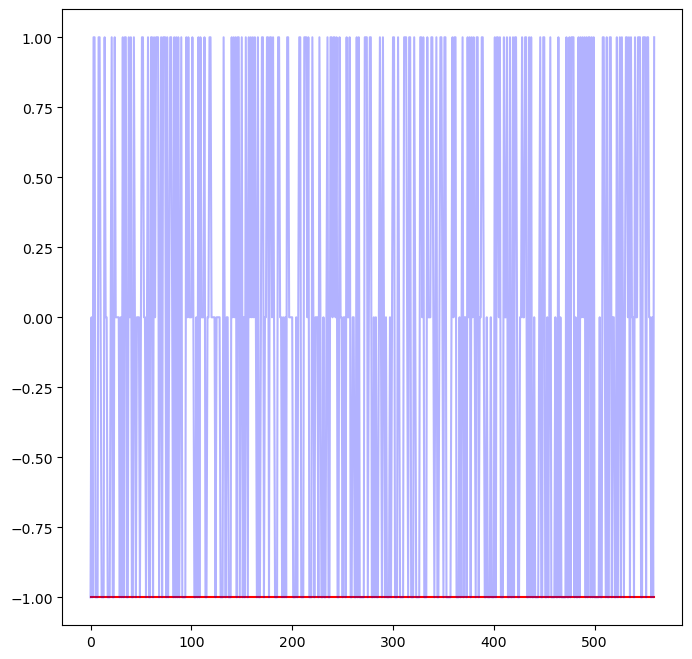

In [158]:
plt.figure(figsize=(8,8))
plt.plot(np.array(pred),'r')
plt.plot(np.array(y_test),'b',alpha=0.3)
plt.show()

In [41]:
data = df 
esn = ESN(n_inputs = 4,
          n_outputs = 1,
          n_reservoir = 500,
          spectral_radius = 1.5,
          random_state=42)


pred_training = esn.fit(X_train,y_train)

InvalidIndexError: (1, slice(None, None, None))